In [1]:
import sys
import os
import time
import numpy as np
import tensorflow as tf
import gpflow
import soundfile
import pickle
sys.path.append('../../../../')
import gpitch
from gpitch.amtgp import logistic
import soundfile
import peakutils
from scipy import signal
from scipy.fftpack import fft, ifft, ifftshift
from scipy import signal

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
visible_device = sys.argv[1]  # configure gpu usage
gpitch.amtgp.init_settings(visible_device=visible_device, interactive=False)

In [4]:
noise_var = 1e-3
N = 16000 # number of frames
f0 = 20.
x = np.linspace(0, 1, N).reshape(-1, 1)
act = signal.hann(N).reshape(-1,1)
com = np.sin(2*np.pi*f0*x) + 0.5*np.sin(2*2*np.pi*f0*x) + 0.25*np.sin(3.1*2*np.pi*f0*x)
y = act*com  + np.sqrt(noise_var)*np.random.randn(N,1)  # generate noisy data
y = (y - y.mean()) / np.max(np.abs(y))

Nc = 3  # number of "harmoncics"
var = np.random.rand(Nc)  # variances
var_scale = 1./ (4.*np.sum(var)) #rescale (sigma)
var *= var_scale
leng = 0.75  # lengthscale
freq = f0*np.asarray(range(1, Nc+ 1))
kern_act = gpflow.kernels.Matern32(input_dim=1, lengthscales=0.05, variance=10.)
kern_com = gpitch.kernels.MaternSpecMix(lengthscales=leng, variances=var, frequencies=freq,
                                        Nc=Nc)

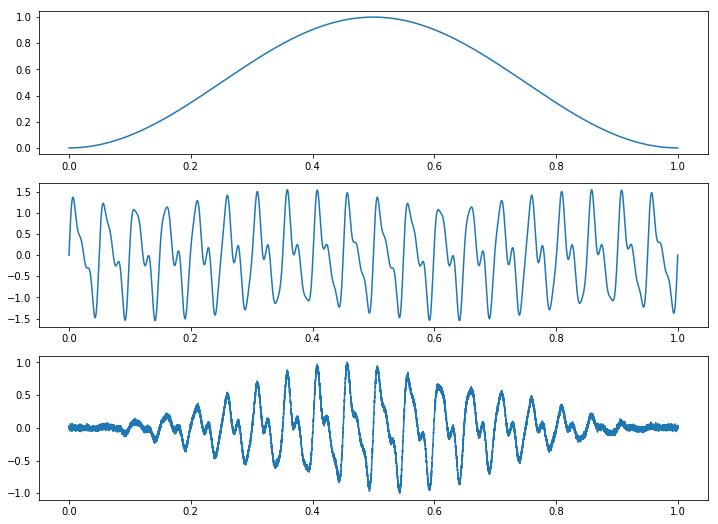

In [5]:
plt.figure(figsize=(12, 9))
plt.subplot(3, 1, 1)
plt.plot(x, act)
plt.subplot(3, 1, 2)
plt.plot(x, com)
plt.subplot(3, 1, 3)
plt.plot(x, y)

In [6]:
results = np.load('../../../../../results/outfile.npz')

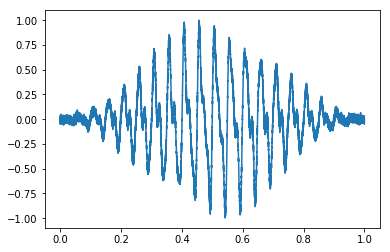

In [7]:
plt.plot(results['x'], results['y'])
# windowed results
c1 = results['pw'][0]
a1 = results['pw'][2]

c2 = results['pnow'][0]
a2 = results['pnow'][2]

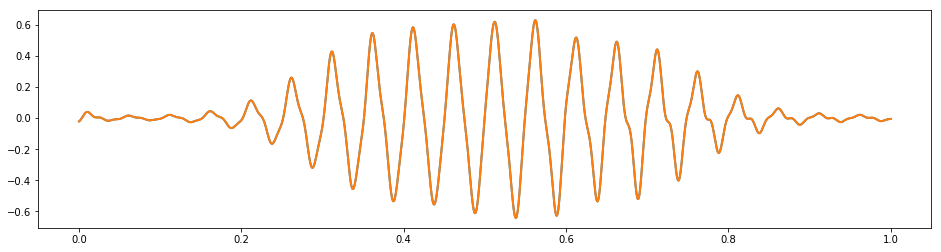

In [20]:
plt.figure(figsize=(16, 4))
plt.plot(results['x'], logistic(a1)*c1, lw=2)
plt.plot(results['x'], logistic(a2)*c2, lw=2)
